# Bootstrapping a Libor Curve

In [1]:
import sys
sys.path.append("..")
sys.path.append("..\\..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.finutils.FinDate import FinDate
from financepy.finutils.FinDayCount import FinDayCountTypes
from financepy.finutils.FinFrequency import FinFrequencyTypes
from financepy.finutils.FinMath import ONE_MILLION
from financepy.products.libor.FinLiborDeposit import FinLiborDeposit
from financepy.products.libor.FinLiborSwap import FinLiborSwap
from financepy.market.curves.FinLiborCurve import FinLiborCurve

In [4]:
tradeDate = FinDate(2019, 8, 9)
spotDays = 2
settlementDate = tradeDate.addDays(spotDays)

## Libor Deposits

In [5]:
dcType = FinDayCountTypes.ACT_360

In [6]:
depo1 = FinLiborDeposit(settlementDate, "1M", 0.022009, dcType)
depo2 = FinLiborDeposit(settlementDate, "2M", 0.022138, dcType)
depo3 = FinLiborDeposit(settlementDate, "3M", 0.021810, dcType)
depo4 = FinLiborDeposit(settlementDate, "6M", 0.020503, dcType)
depo5 = FinLiborDeposit(settlementDate, "12M", 0.019930, dcType)

In [7]:
depos = [depo1,depo2,depo3,depo4,depo5]

In [8]:
dcType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL

## Interest Rate Swaps

In [9]:
dcType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL

In [10]:
swap1 = FinLiborSwap(settlementDate,"2Y",0.015910,fixedFreq,dcType)
swap2 = FinLiborSwap(settlementDate,"3Y",0.014990,fixedFreq,dcType)
swap3 = FinLiborSwap(settlementDate,"4Y",0.014725,fixedFreq,dcType)
swap4 = FinLiborSwap(settlementDate,"5Y",0.014640,fixedFreq,dcType)
swap5 = FinLiborSwap(settlementDate,"6Y",0.014800,fixedFreq,dcType)
swap6 = FinLiborSwap(settlementDate,"7Y",0.014995,fixedFreq,dcType)
swap7 = FinLiborSwap(settlementDate,"8Y",0.015180,fixedFreq,dcType)
swap8 = FinLiborSwap(settlementDate,"9Y",0.015610,fixedFreq,dcType)
swap9 = FinLiborSwap(settlementDate,"10Y",0.0159880,fixedFreq,dcType)
swap10 = FinLiborSwap(settlementDate,"12Y",0.016430,fixedFreq,dcType)

In [11]:
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

In [12]:
fras = []

# Bootstrapping The Curve

In [13]:
liborCurve = FinLiborCurve("USD_LIBOR", settlementDate, depos, fras, swaps)

Can we show that the Libor deposits have been repriced at par

In [14]:
for depo in depos:
    v = depo.value(settlementDate, liborCurve)
    print(depo._notional, depo._maturityDate, v)

1000000 WED 11 SEP 2019 1000000.0002230834
1000000 FRI 11 OCT 2019 1000000.0002230834
1000000 MON 11 NOV 2019 1000000.0002230834
1000000 TUE 11 FEB 2020 1000000.0002230834
1000000 TUE 11 AUG 2020 1000000.0002230834


In [15]:
for swap in swaps:
    v = swap.value(settlementDate, liborCurve, liborCurve, None)
    print(swap._notional, swap._maturityDate, v)

1000000 WED 11 AUG 2021 0.00022156798965000668
1000000 THU 11 AUG 2022 0.00021037051961547704
1000000 FRI 11 AUG 2023 0.00017605036178869327
1000000 SUN 11 AUG 2024 3.520156201031188
1000000 MON 11 AUG 2025 -3.140157578407354e-05
1000000 TUE 11 AUG 2026 -0.00025778384982189095
1000000 WED 11 AUG 2027 -0.0006043369693564671
1000000 FRI 11 AUG 2028 -0.0012274153082802997
1000000 SAT 11 AUG 2029 -3.622570171196715
1000000 MON 11 AUG 2031 0.00022307697356005463


The worst is 4 units error on a notional of 1 million units - but we need to investigate this

In [16]:
swap9.printFixedLeg(settlementDate)

START DATE: SUN 11 AUG 2019
MATURITY DATE: SAT 11 AUG 2029
COUPON (%): 1.5987999999999998
FIXED LEG FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FIXED LEG DAY COUNT: FinDayCountTypes.THIRTY_E_360_ISDA
VALUATION DATE SUN 11 AUG 2019
PAYMENT_DATE     YEAR_FRAC        FLOW         DF         DF*FLOW       CUM_PV
TUE 11 FEB 2020  0.4972222      7949.59     0.989629      7867.15      7867.15
TUE 11 AUG 2020  0.5000000      7994.00     0.980140      7835.24     15702.39
THU 11 FEB 2021  0.5000000      7994.00     0.974465      7789.87     23492.26
WED 11 AUG 2021  0.5000000      7994.00     0.968915      7745.50     31237.77
FRI 11 FEB 2022  0.5000000      7994.00     0.962550      7694.63     38932.39
THU 11 AUG 2022  0.5000000      7994.00     0.956330      7644.90     46577.29
MON 13 FEB 2023  0.5055556      8082.82     0.949599      7675.44     54252.74
FRI 11 AUG 2023  0.4944444      7905.18     0.943166      7455.90     61708.63
MON 12 FEB 2024  0.5027778      8038.41     0.936402      752

In [17]:
swap9.printFloatLeg(settlementDate)

START DATE: SUN 11 AUG 2019
MATURITY DATE: SAT 11 AUG 2029
SPREAD COUPON (%): 0.0
FLOAT LEG FREQUENCY: FinFrequencyTypes.QUARTERLY
FLOAT LEG DAY COUNT: FinDayCountTypes.THIRTY_360
VALUATION DATE SUN 11 AUG 2019
PAYMENT_DATE     YEAR_FRAC        FLOW         DF         DF*FLOW       CUM_PV
MON 11 NOV 2019  0.2472222      5573.67     0.994457      5542.77      5542.77
TUE 11 FEB 2020  0.2500000      4878.45     0.989629      4827.86     10370.63
MON 11 MAY 2020  0.2500000      4775.85     0.984926      4703.85     15074.49
TUE 11 AUG 2020  0.2500000      4882.24     0.980140      4785.28     19859.76
WED 11 NOV 2020  0.2500000      2907.68     0.977299      2841.67     22701.43
THU 11 FEB 2021  0.2500000      2907.68     0.974465      2833.43     25534.86
TUE 11 MAY 2021  0.2500000      2812.73     0.971732      2733.22     28268.08
WED 11 AUG 2021  0.2500000      2907.68     0.968915      2817.29     31085.37
THU 11 NOV 2021  0.2500000      3300.63     0.965727      3187.51     34272.87

Do I need to adjust the final maturity flow date ?

## The Forward Curve

In [18]:
times = np.linspace(0,15,1000)
fwds = liborCurve.fwd(times)

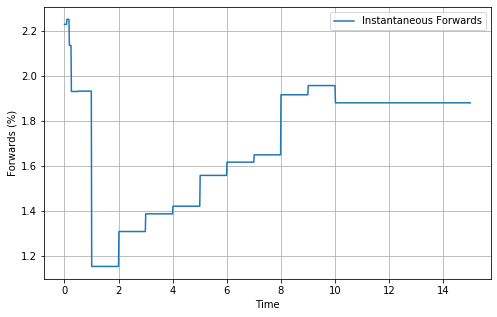

In [19]:
plt.figure(figsize=(8,5))
plt.plot(times,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

Zoom in one the short end

In [20]:
times = np.linspace(0,1.0,1000)
fwds = liborCurve.fwd(times)

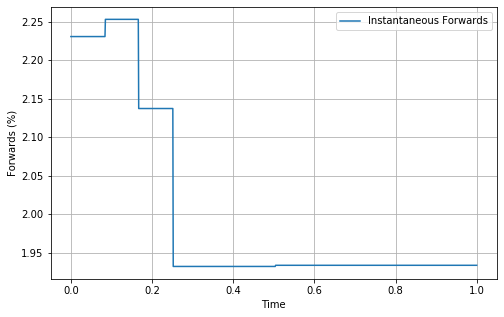

In [21]:
plt.figure(figsize=(8,5))
plt.plot(times,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

## Extracting the Zero Rate Curves

We choose a range of zero rate frequencies.

In [22]:
times = np.linspace(0,15,1000)
zerosC = liborCurve.zeroRate(times,-1)
zeros1 = liborCurve.zeroRate(times,1)
zeros2 = liborCurve.zeroRate(times,2)
zeros4 = liborCurve.zeroRate(times,4)

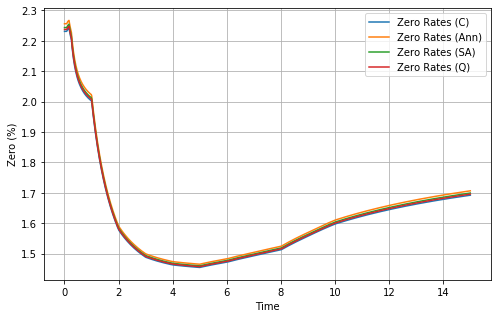

In [23]:
plt.figure(figsize=(8,5))
plt.plot(times,zerosC*100, label="Zero Rates (C)")
plt.plot(times,zeros1*100, label="Zero Rates (Ann)")
plt.plot(times,zeros2*100, label="Zero Rates (SA)")
plt.plot(times,zeros4*100, label="Zero Rates (Q)")
plt.xlabel("Time")
plt.ylabel("Zero (%)")
plt.legend()
plt.grid()